In [5]:
#Importing the required libraries.
import pandas as pd #for dataframes and reading csv files.
import numpy as np # for math operations(sqrt)
import matplotlib.pyplot as plt #for plotting the graphs


#make the axes white
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
        "axes.titlecolor":"w"}
plt.rcParams.update(params)

In [6]:
#dataframe from day_od.csv: "day origin and destination"
file_name="data/day_od.csv"
read_day_od=pd.read_csv(file_name,sep=",",encoding='utf-16', header=0) #comment: explicit header=0 to replace column names;  
columns=["Month","Dow","Origin","Destination","Cust_Class","Cod_Country","Cod_Pro","Pro_Com","Flow"]
read_day_od.columns=columns

day_od=pd.DataFrame(read_day_od)#dataFrame of the file(can be read more easily than csv)
day_od

,Month,Dow,Origin,Destination,Cust_Class,Cod_Country,Cod_Pro,Pro_Com,Flow
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136
...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36


### Challenge: convert into datetime the months to check the flow per day within a month <br>
day_od1=day_od.replace([ "Febbraio", "Marzo","Aprile","Maggio","Lunedì","Martedì","Mercoledì","Giovedì", "Venerdì", "Sabato","Domenica"],
                      ["Feb","Mar","Apr","May","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
day_od1["Month"]=pd.to_datetime(day_od1["Month"], format="%b").dt.month
day_od1.groupby(["Month","Dow"]).count()

In [25]:
#Read distinct_users_day.csv
file_name="data/distinct_users_day.csv"
read_users_day=pd.read_csv(file_name,sep=",",encoding="latin-1")
dist_users_day=pd.DataFrame(read_users_day)
dist_users_day

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222.0,35.0,35033.0,968
1,Lunedì,visitor,222.0,22.0,22098.0,64
2,Domenica,visitor,222.0,52.0,52032.0,516
3,Giovedì,visitor,222.0,108.0,108009.0,128
4,Giovedì,visitor,222.0,29.0,29048.0,512
...,...,...,...,...,...,...
12840,Mercoledì,foreigner,259.0,NaN,NaN,176
12841,Sabato,foreigner,602.0,NaN,NaN,164
12842,Giovedì,foreigner,732.0,NaN,NaN,80
12843,Giovedì,foreigner,297.0,NaN,NaN,80


In [10]:

# Getting DataFrame for codici_istat_comune.csv
file_name="data/codici_istat_comune.csv"
data_cic=pd.read_csv(file_name,sep=",",delimiter=',',header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_com=pd.DataFrame(data_cic)
codist_com.head()

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0


In [11]:
# Getting DataFrame for codici_istat_provincia.csv
file_name="data/codici_istat_provincia.csv"
data_cip=pd.read_csv(file_name,sep=",",header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_prov=pd.DataFrame(data_cip)
codist_prov

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
...,...,...,...,...
103,20,91,Nuoro,NU
104,20,92,Cagliari,CA
105,20,95,Oristano,OR
106,20,111,Sud Sardegna,SU


In [12]:
# Getting DataFrame for codici_nazioni.csv
import csv
file_name="data/codici_nazioni.csv"
data_cin=pd.read_csv(file_name,delimiter=',',header=0,quoting=2, #quoting=2 "Non-Numerical value ex. "Colombia";
                                error_bad_lines=True,encoding="utf-16",quotechar = '"',escapechar='\r')
codist_naz=pd.DataFrame(data_cin)
codist_naz[108:112]



,COD_COUNTRY,COUNTRY_NAME_IT
108,658.0,"Isola di Sant'Elena, Ascension e Tristan de Cugna"
109,732.0,Colombia
110,740.0,Ecuador
111,746.0,Suriname


In [13]:
#Getting DataFrame for veneto.txt
file_name="data/Veneto.txt"
data_veneto=pd.read_csv(file_name,delimiter=';',header=0,quoting=0,error_bad_lines=False,encoding="Latin-1")
codist_ven=pd.DataFrame(data_veneto)
codist_ven

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [30]:
# Assignment 2

# read COD_COUNTRY for foreigner, then sum whole visitors
dist_users_day_1=dist_users_day[dist_users_day.CUST_CLASS.str.contains(' '.join(['foreigner']))]
dist_users_day_1=dist_users_day_1.groupby(["COD_COUNTRY"],as_index=False)['VISITORS'].sum()
# sorting the number of visitors from most to least
sorted_distinct_users_day=dist_users_day_1.sort_values( "VISITORS",ascending=False,inplace=False)
ranked_20=sorted_distinct_users_day.head(n=20) # First 20 countries are ranked
# Ranked Countries
cod_coun_ranked_20=["Francia","Svizzera","Germania","Cina","Austria","Spagna","Paesi Bassi",
"Stati Uniti d'America","Romania","Gran Bretagna","Russia","Ungheria","Croazia","Slovenia",
"Belgio","Bulgaria","Polonia","Giappone","Repubblica Ceca","Messico"]
#storing visitor and country names
visitors_ranked_20=ranked_20.VISITORS
ylabel=cod_coun_ranked_20


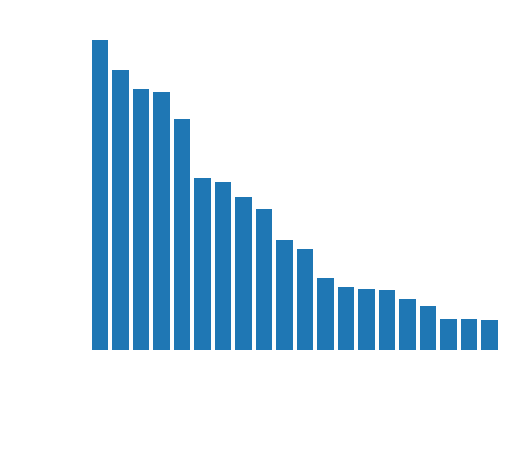

In [31]:
#plotting
plt.bar(cod_coun_ranked_20,visitors_ranked_20)
plt.xticks(rotation='60') # vertical label alignment
plt.rcParams['figure.figsize'] = [20, 5] # 8 by 6 inches
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=15)
plt.title('Ranking of visitors from foreign countries',fontsize=15)
plt.show()